In [ ]:
from numpy import loadtxt
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from google.colab import drive
import numpy as np
import pickle
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
files = []
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s01.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s02.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s03.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s04.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s05.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s06.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s07.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s08.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s09.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s10.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s11.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s12.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s13.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s14.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s15.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s16.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s17.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s18.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s19.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s20.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s21.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s22.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s23.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s24.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s25.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s26.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s27.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s28.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s29.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s30.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s31.dat')
files.append('/content/gdrive/MyDrive/deapdata/data_preprocessed_python/s32.dat')


In [ ]:
# wczytanie danych i preprocessing 1
table_of_dataX = []
table_of_dataY = []
for i in range(32):
  f = files[i]
  with open(f, 'rb') as f: content = pickle.load(f, encoding='latin1')
  data = content['data']
  labels = content['labels']
  for j in range(40): #40 filmow
    vector_input = []
    tmpX = data[j]
    tmpY = labels[j]
    table_of_dataY.append(tmpY)
    for k in range(40): #40 sygnalow
      mean = np.mean(tmpX[k])
      median = np.median(tmpX[k])
      max = np.max(tmpX[k])
      min = np.min(tmpX[k])
      variance = np.var(tmpX[k])
      skewness = skew(tmpX[k])
      kur = kurtosis(tmpX[k])
      vector_input.append(mean)
      vector_input.append(median)
      vector_input.append(max)
      vector_input.append(min)
      vector_input.append(variance)
      vector_input.append(skewness)
      vector_input.append(kur)
    table_of_dataX.append(vector_input)
    

In [ ]:
table_of_dataX = np.asarray(table_of_dataX)
table_of_dataY = np.asarray(table_of_dataY)

In [ ]:
randnums = [   4,    5,   26,   34,   36,   52,   56,   57,   72,   80,   87,
         92,  119,  134,  141,  155,  165,  197,  228,  233,  239,  289,
        291,  293,  311,  315,  318,  334,  371,  375,  383,  416,  434,
        435,  442,  444,  450,  471,  472,  475,  502,  504,  509,  516,
        540,  549,  550,  555,  587,  603,  622,  623,  635,  648,  676,
        692,  693,  694,  702,  716,  732,  745,  754,  758,  760,  764,
        772,  773,  778,  779,  787,  814,  815,  817,  846,  850,  865,
        872,  876,  881,  889,  895,  901,  935,  936,  963,  976,  984,
        991,  992,  996, 1010, 1013, 1017, 1020, 1060, 1067, 1070, 1071,
       1087, 1088, 1091, 1098, 1118, 1122, 1130, 1148, 1150, 1166, 1171,
       1187, 1197, 1213, 1219, 1225, 1240, 1259, 1260, 1264, 1271]

In [ ]:
testdataX = []
testdataY = []
for i in randnums:
  testdataX.append(table_of_dataX[i])
  testdataY.append(table_of_dataY[i])
table_of_dataX_learn = np.delete(table_of_dataX, randnums, 0)
table_of_dataY_learn = np.delete(table_of_dataY, randnums, 0)
  

In [ ]:
divider_array = np.max(np.abs(table_of_dataX_learn), axis=0)
table_of_dataX_learn_normed = table_of_dataX_learn/divider_array
testdataX_normed = testdataX/divider_array
testdataY = np.asarray(testdataY)
len(table_of_dataX_learn_normed)


  

1160

In [ ]:

class MyCustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        res_eval_1 = self.model.evaluate(testdataX_normed, testdataY, verbose = 0)
        print(res_eval_1)

In [ ]:
num_folds = 5
fold_no = 1
loss_per_fold = []
minimal_val_losses = []
minimal_val_losses_index = []
kfold = KFold(n_splits=num_folds, shuffle=True)
for train, test in kfold.split(table_of_dataX_learn_normed, table_of_dataY_learn):
  model = Sequential()
  model.add(layers.Dense(70, input_shape=(280,), activation='relu'))
  model.add(layers.Dense(25,activation='relu',))
  model.add(layers.Dense(4))
  model.compile(optimizer='adam',
              loss='mse'
              )
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  print(len(table_of_dataX_learn_normed[train]))
  #callback = keras.callbacks.EarlyStopping(monitor='loss', patience=8)
  myval_callback = MyCustomCallback()
  history = model.fit(table_of_dataX_learn_normed[train], 
                    table_of_dataY_learn[train], 
                    epochs=75,
                    verbose=1,
                    batch_size = 32,
                    callbacks = [myval_callback],
                    validation_data = (table_of_dataX_learn_normed[test], table_of_dataY_learn[test])
                   )
  print('------------------------------------------------------------------------')
  print('Minimal loss epoch and value')
  min_loss = np.min(history.history['val_loss'])
  minimal_val_losses.append(min_loss)
  minimal_val_losses_index.append(np.argmin(history.history['val_loss']))
  print(min_loss) 
  scores = model.evaluate(table_of_dataX_learn_normed[test], table_of_dataY_learn[test], verbose=0)
  loss_per_fold.append(scores)
  fold_no = fold_no + 1
  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(loss_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

  

------------------------------------------------------------------------
Training for fold 1 ...
928
Epoch 1/75
29/29 [==============================] - 1s 12ms/step - loss: 30.8853 - val_loss: 20.5815
19.379291534423828
Epoch 2/75
29/29 [==============================] - 0s 3ms/step - loss: 16.0684 - val_loss: 10.5039
13.057282447814941
Epoch 3/75
29/29 [==============================] - 0s 4ms/step - loss: 11.0218 - val_loss: 8.1281
9.768738746643066
Epoch 4/75
29/29 [==============================] - 0s 3ms/step - loss: 8.0163 - val_loss: 6.8006
8.481188774108887
Epoch 5/75
29/29 [==============================] - 0s 3ms/step - loss: 6.7311 - val_loss: 6.0072
7.666383743286133
Epoch 6/75
29/29 [==============================] - 0s 3ms/step - loss: 6.1498 - val_loss: 5.4835
7.093696117401123
Epoch 7/75
29/29 [==============================] - 0s 3ms/step - loss: 5.6440 - val_loss: 5.1408
6.629098415374756
Epoch 8/75
29/29 [==============================] - 0s 3ms/step - loss: 5.0614 

In [ ]:
print(minimal_val_losses_index)
print(minimal_val_losses)

[19, 43, 35, 23, 18]
[4.0626349449157715, 4.479568958282471, 4.260873794555664, 5.098584175109863, 4.4953999519348145]


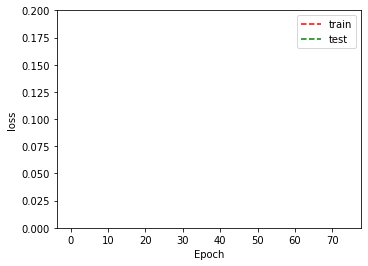

In [ ]:
def draw_curves(history, key1='accuracy', ylim1=(0.8, 1.00), 
                key2='loss', ylim2=(0.0, 1.0)):
    plt.figure(figsize=(12,4))
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history[key2], "r--")
    plt.plot(history.history['val_' + key2], "g--")
    plt.ylabel(key2)
    plt.xlabel('Epoch')
    plt.ylim(ylim2)
    plt.legend(['train', 'test'], loc='best')
     
    plt.show()
     
draw_curves(history, key1='accuracy', ylim1=(0.7, 0.95), 
            key2='loss', ylim2=(0.0, 0.2))